In [3]:
# Dataset: https://www.kaggle.com/rakannimer/air-passengers
import math
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'

In [6]:
dataset = pandas.read_csv('../../datasets/AirPassengers.csv')

In [7]:
dataset.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


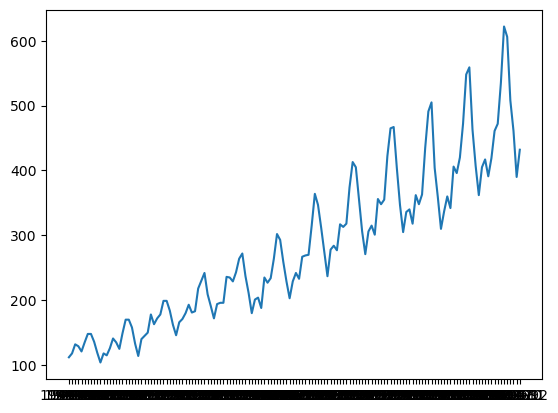

In [8]:
plt.plot(dataset['Month'], dataset['#Passengers'])
plt.show()

In [9]:
# Separando os dados entre treino e teste
# Vamos separar 33% para teste. Em vez de coletar amostras aleatoriamente com a função train_test_split, iremos coletar do início
#até 67% dos dados para treino e deixar o final para teste. 
tamanho_treino = int(len(dataset) * 0.67)
treino, teste = dataset[0:tamanho_treino], dataset[tamanho_treino:len(dataset)]
teste = teste.reset_index(drop=True) # Como depois iremos usar o comando .loc, precisaremos que os índices estejam iniciando em zero em ambos os dataframes

In [10]:
def gera_dataset(dataset, tamanho_janela):
    dataA, dataB = [], []
    for i in range(len(dataset)-tamanho_janela): # lembre-se que os datasets têm índices começando em zero
        a = dataset[i:(i+tamanho_janela)]['#Passengers'].values #armazena todos os dados localizados da linha i até i + tamanho_janela
        dataA.append(a)
        dataB.append(dataset.loc[[i+tamanho_janela]]['#Passengers'].values) #armazena apenas o dado localizado na linha i + tamanho_janela (esse não foi pego por dataA).
    return np.asarray(dataA, dtype=np.float32), np.asarray(dataB, dtype=np.float32)

In [25]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela=1
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [26]:
# Criando o modelo MLP com nº neurônios de entrada==tamanho_janela, 1 camada oculta de 8 neurônios e uma camada de saída:
modelo = Sequential()

# Camada de entrada + camada oculta
modelo.add(Dense(8, input_dim = tamanho_janela, activation = 'relu'))

# Camada de saída
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compilação
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Treinando o modelo:
modelo.fit(x_treino, y_treino, epochs = 400, batch_size = 5, verbose = 2) 
# O objetivo é treinar a rede para prever o próximo valor sempre que determinado valor é informado. 
# Isso significa que uma entrada X tem como valor correto Y o próximo elemento.

Epoch 1/400
19/19 - 2s - 95ms/step - loss: 50155.3945
Epoch 2/400
19/19 - 0s - 3ms/step - loss: 45181.1250
Epoch 3/400
19/19 - 0s - 3ms/step - loss: 40717.6836
Epoch 4/400
19/19 - 0s - 3ms/step - loss: 36375.3477
Epoch 5/400
19/19 - 0s - 4ms/step - loss: 31996.3477
Epoch 6/400
19/19 - 0s - 3ms/step - loss: 27487.7324
Epoch 7/400
19/19 - 0s - 3ms/step - loss: 22987.6367
Epoch 8/400
19/19 - 0s - 4ms/step - loss: 18677.3164
Epoch 9/400
19/19 - 0s - 3ms/step - loss: 14535.1660
Epoch 10/400
19/19 - 0s - 3ms/step - loss: 10985.8799
Epoch 11/400
19/19 - 0s - 3ms/step - loss: 7909.5381
Epoch 12/400
19/19 - 0s - 5ms/step - loss: 5511.7383
Epoch 13/400
19/19 - 0s - 5ms/step - loss: 3703.1677
Epoch 14/400
19/19 - 0s - 4ms/step - loss: 2390.8591
Epoch 15/400
19/19 - 0s - 4ms/step - loss: 1615.3536
Epoch 16/400
19/19 - 0s - 5ms/step - loss: 1088.9634
Epoch 17/400
19/19 - 0s - 4ms/step - loss: 808.3791
Epoch 18/400
19/19 - 0s - 4ms/step - loss: 679.2380
Epoch 19/400
19/19 - 0s - 3ms/step - loss: 598

In [28]:
# Estimando a performance do modelo

score_treino = modelo.evaluate(x_treino, y_treino, verbose = 0)
print('Score em Treino: %.2f MSE (%.2f RMSE)' % (score_treino, math.sqrt(score_treino)))
score_teste = modelo.evaluate(x_teste, y_teste, verbose = 0)
print('Score em Teste: %.2f MSE (%.2f RMSE)' % (score_teste, math.sqrt(score_teste)))

Score em Treino: 538.43 MSE (23.20 RMSE)
Score em Teste: 2342.23 MSE (48.40 RMSE)


In [ ]:
# Tomando a raiz quadrada das estimativas de desempenho, podemos ver que o modelo tem um erro médio de 23 passageiros 
# (em milhares) no conjunto de dados de treinamento e 48 passageiros (em milhares) no conjunto de dados de teste.

In [19]:
# Aumentando o tamanho da janela:
tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [20]:
# Criando o modelo MLP com nº neurônios de entrada==tamanho_janela, 1 camada oculta de 8 neurônios e uma camada de saída:
modelo = Sequential()

# Camada de entrada + camada oculta
modelo.add(Dense(8, input_dim = tamanho_janela, activation = 'relu'))

# Camada de saída
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compilação
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Fit do modelo:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2) 

Epoch 1/200
18/18 - 0s - 3ms/step - loss: 612.5629
Epoch 2/200
18/18 - 0s - 4ms/step - loss: 589.5913
Epoch 3/200
18/18 - 0s - 4ms/step - loss: 584.2025
Epoch 4/200
18/18 - 0s - 3ms/step - loss: 583.2964
Epoch 5/200
18/18 - 0s - 3ms/step - loss: 577.0034
Epoch 6/200
18/18 - 0s - 3ms/step - loss: 577.9934
Epoch 7/200
18/18 - 0s - 3ms/step - loss: 585.0131
Epoch 8/200
18/18 - 0s - 3ms/step - loss: 576.8048
Epoch 9/200
18/18 - 0s - 3ms/step - loss: 557.9894
Epoch 10/200
18/18 - 0s - 3ms/step - loss: 566.8371
Epoch 11/200
18/18 - 0s - 4ms/step - loss: 556.2717
Epoch 12/200
18/18 - 0s - 4ms/step - loss: 565.5884
Epoch 13/200
18/18 - 0s - 4ms/step - loss: 560.8801
Epoch 14/200
18/18 - 0s - 4ms/step - loss: 552.9175
Epoch 15/200
18/18 - 0s - 3ms/step - loss: 548.3987
Epoch 16/200
18/18 - 0s - 3ms/step - loss: 553.6426
Epoch 17/200
18/18 - 0s - 3ms/step - loss: 540.4510
Epoch 18/200
18/18 - 0s - 3ms/step - loss: 540.2914
Epoch 19/200
18/18 - 0s - 5ms/step - loss: 545.5988
Epoch 20/200
18/18 - 

In [24]:
# Estimando a performance do modelo
score_treino = modelo.evaluate(x_treino, y_treino, verbose = 0)
print('Score em Treino: %.2f MSE (%.2f RMSE)' % (score_treino, math.sqrt(score_treino)))
score_teste = modelo.evaluate(x_teste, y_teste, verbose = 0)
print('Score em Teste: %.2f MSE (%.2f RMSE)' % (score_teste, math.sqrt(score_teste)))

Score em Treino: 365.06 MSE (19.11 RMSE)
Score em Teste: 1401.29 MSE (37.43 RMSE)


In [29]:
# Utilizando LSTM:
from keras.layers import LSTM

In [30]:
from sklearn.preprocessing import MinMaxScaler
# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset['#Passengers'] = scaler.fit_transform(dataset['#Passengers'].values.reshape(-1,1))
tamanho_treino = int(len(dataset) * 0.67)
treino, teste = dataset[0:tamanho_treino], dataset[tamanho_treino:len(dataset)]
teste = teste.reset_index(drop=True)

In [31]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela=1
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [32]:
# Reshape do input:
x_treino = np.reshape(x_treino, (x_treino.shape[0], 1, x_treino.shape[1])) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], 1, x_teste.shape[1]))

In [33]:
# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape = (1, 1))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores: n_timesteps e n_features da variável X (entrada).

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2)

Epoch 1/200
19/19 - 2s - 122ms/step - loss: 0.0305
Epoch 2/200
19/19 - 0s - 4ms/step - loss: 0.0206
Epoch 3/200
19/19 - 0s - 4ms/step - loss: 0.0144
Epoch 4/200
19/19 - 0s - 4ms/step - loss: 0.0108
Epoch 5/200
19/19 - 0s - 3ms/step - loss: 0.0090
Epoch 6/200
19/19 - 0s - 4ms/step - loss: 0.0083
Epoch 7/200
19/19 - 0s - 4ms/step - loss: 0.0079
Epoch 8/200
19/19 - 0s - 4ms/step - loss: 0.0076
Epoch 9/200
19/19 - 0s - 4ms/step - loss: 0.0073
Epoch 10/200
19/19 - 0s - 4ms/step - loss: 0.0071
Epoch 11/200
19/19 - 0s - 4ms/step - loss: 0.0068
Epoch 12/200
19/19 - 0s - 4ms/step - loss: 0.0064
Epoch 13/200
19/19 - 0s - 8ms/step - loss: 0.0062
Epoch 14/200
19/19 - 0s - 3ms/step - loss: 0.0059
Epoch 15/200
19/19 - 0s - 3ms/step - loss: 0.0056
Epoch 16/200
19/19 - 0s - 3ms/step - loss: 0.0054
Epoch 17/200
19/19 - 0s - 4ms/step - loss: 0.0051
Epoch 18/200
19/19 - 0s - 4ms/step - loss: 0.0048
Epoch 19/200
19/19 - 0s - 4ms/step - loss: 0.0046
Epoch 20/200
19/19 - 0s - 4ms/step - loss: 0.0044
Epoch 2

In [35]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))
print('Score em Teste: %.2f RMSE' % (score_treino))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Score em Treino: 22.81 RMSE
Score em Teste: 22.81 RMSE


In [36]:
# Aplicando LSTM com window:

tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

# Reshape do input:
x_treino = np.reshape(x_treino, (x_treino.shape[0], 1, x_treino.shape[1])) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], 1, x_teste.shape[1]))

# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape = (1, x_treino.shape[2]))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores: n_timesteps e n_features da variável X (entrada).
# Obs: repare que no início do código, logo após aplicar a função create_dataset, x_treino e x_teste possuem duas dimensões,
# por isso que pegamos as features com x_treino.shape[1]. Depois fazemos um reshape, por isso que pegamos as features de x_treino
# no LSTM com x_treino.shape[2], pois essa infomação está na 3ª dimensão agora.

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
x_treino.shape

In [37]:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2)

Epoch 1/200
18/18 - 2s - 133ms/step - loss: 0.0103
Epoch 2/200
18/18 - 0s - 5ms/step - loss: 0.0060
Epoch 3/200
18/18 - 0s - 5ms/step - loss: 0.0057
Epoch 4/200
18/18 - 0s - 4ms/step - loss: 0.0055
Epoch 5/200
18/18 - 0s - 4ms/step - loss: 0.0054
Epoch 6/200
18/18 - 0s - 4ms/step - loss: 0.0052
Epoch 7/200
18/18 - 0s - 4ms/step - loss: 0.0051
Epoch 8/200
18/18 - 0s - 4ms/step - loss: 0.0050
Epoch 9/200
18/18 - 0s - 4ms/step - loss: 0.0049
Epoch 10/200
18/18 - 0s - 4ms/step - loss: 0.0048
Epoch 11/200
18/18 - 0s - 5ms/step - loss: 0.0047
Epoch 12/200
18/18 - 0s - 5ms/step - loss: 0.0046
Epoch 13/200
18/18 - 0s - 4ms/step - loss: 0.0046
Epoch 14/200
18/18 - 0s - 4ms/step - loss: 0.0045
Epoch 15/200
18/18 - 0s - 4ms/step - loss: 0.0045
Epoch 16/200
18/18 - 0s - 5ms/step - loss: 0.0045
Epoch 17/200
18/18 - 0s - 4ms/step - loss: 0.0044
Epoch 18/200
18/18 - 0s - 4ms/step - loss: 0.0042
Epoch 19/200
18/18 - 0s - 4ms/step - loss: 0.0042
Epoch 20/200
18/18 - 0s - 4ms/step - loss: 0.0041
Epoch 2

In [38]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Score em Treino: 20.95 RMSE
Score em Teste: 43.61 RMSE


In [39]:
# Aplicando LSTM com timesteps:

tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

# Reshape do input:
x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1)) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

# Criando o modelo LSTM
modelo = Sequential()
modelo.add(LSTM(4, input_shape = (x_treino.shape[1], 1))) # O primeiro parâmetro é a quantidade de neurônios ocultos
# Em input_shape nós precisamos informar apenas 2 valores: n_timesteps e n_features da variável X (entrada).
# Obs: repare que agora o n_timesteps e n_features mudaram de posição, portanto preciso pegar x_treino.shape[1] em vez de ..[2].

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

c:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 5, verbose = 2)

Epoch 1/200
18/18 - 2s - 110ms/step - loss: 0.0688
Epoch 2/200
18/18 - 0s - 6ms/step - loss: 0.0458
Epoch 3/200
18/18 - 0s - 6ms/step - loss: 0.0299
Epoch 4/200
18/18 - 0s - 5ms/step - loss: 0.0213
Epoch 5/200
18/18 - 0s - 5ms/step - loss: 0.0150
Epoch 6/200
18/18 - 0s - 7ms/step - loss: 0.0131
Epoch 7/200
18/18 - 0s - 5ms/step - loss: 0.0120
Epoch 8/200
18/18 - 0s - 6ms/step - loss: 0.0115
Epoch 9/200
18/18 - 0s - 6ms/step - loss: 0.0109
Epoch 10/200
18/18 - 0s - 6ms/step - loss: 0.0104
Epoch 11/200
18/18 - 0s - 6ms/step - loss: 0.0098
Epoch 12/200
18/18 - 0s - 6ms/step - loss: 0.0093
Epoch 13/200
18/18 - 0s - 7ms/step - loss: 0.0088
Epoch 14/200
18/18 - 0s - 6ms/step - loss: 0.0083
Epoch 15/200
18/18 - 0s - 5ms/step - loss: 0.0079
Epoch 16/200
18/18 - 0s - 6ms/step - loss: 0.0075
Epoch 17/200
18/18 - 0s - 6ms/step - loss: 0.0069
Epoch 18/200
18/18 - 0s - 6ms/step - loss: 0.0065
Epoch 19/200
18/18 - 0s - 7ms/step - loss: 0.0062
Epoch 20/200
18/18 - 0s - 6ms/step - loss: 0.0058
Epoch 2

In [41]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino)
previsao_teste = modelo.predict(x_teste)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001CAEACAAA20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Score em Treino: 22.42 RMSE
Score em Teste: 52.28 RMSE


In [42]:
# Usando stateful:

tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

# Reshape do input:
x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1)) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

In [ ]:
x_treino.shape

In [ ]:
x_teste.shape

In [43]:
# Empilhando LSTMs com stateful = True:

modelo = Sequential()
modelo.add(LSTM(4, batch_input_shape = (2, x_treino.shape[1], 1), stateful = True, return_sequences = True))  
modelo.add(LSTM(4, batch_input_shape = (2, x_treino.shape[1], 1), stateful = True))

modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')
modelo.fit(x_treino, y_treino, epochs = 200, batch_size = 2, shuffle = False, verbose = 2)

ValueError: Unrecognized keyword arguments passed to LSTM: {'batch_input_shape': (2, 10, 1)}

In [ ]:
from sklearn.metrics import mean_squared_error

# Previsões
previsao_treino = modelo.predict(x_treino, batch_size=2)
previsao_teste = modelo.predict(x_teste, batch_size=2)

# Inverte as previsões por conta da normalização
previsao_treino = scaler.inverse_transform(previsao_treino)
y_treino = scaler.inverse_transform(y_treino)
previsao_teste = scaler.inverse_transform(previsao_teste)
y_teste = scaler.inverse_transform(y_teste)

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsao_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsao_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))